# Antibody Benchmark

This data is a subset of the Docking Benchmark5.5 containing only Antibody-Antigen Complexes.

The excel sheet is downloaded from https://piercelab.ibbr.umd.edu/antibody_benchmark/antibody_benchmark_cases.xlsx (Downloaded 30.04.2022)

The PDB Files are downloaded from their GitHub Repository: https://github.com/piercelab/antibody_benchmark (30.04.2022)

In [1]:
import pandas as pd
import yaml
import os
import numpy as np

In [2]:
from abag_affinity.utils.config import read_config, get_resources_paths

In [3]:
config = read_config("../../config.yaml")
# define filepaths
summary_path, pdb_path = get_resources_paths(config, "AntibodyBenchmark")

In [4]:
summary_path

'/home/fabian/Desktop/Uni/Masterthesis/ag_binding_affinity/resources/antibody_benchmark/antibody_benchmark_cases.xlsx'

In [5]:
summary_df = pd.read_excel(summary_path)
print("There are {} ab-ag cases".format(len(summary_df)))
summary_df.head()

There are 67 ab-ag cases


,Complex PDB,Antibody PDB,Antibody,Antigen PDB,Antigen,I-RMSD (Å),ΔASA (Å2),Category,New,Kd (nM),ΔG (kcal/mol)
0,1AHW_AB:C,1FGN_LH,Fab 5g9,1TFH_A,Tissue factor,0.69,1899.0,Rigid,NaN,NaN,-11.55
1,1DQJ_AB:C,1DQQ_CD,Fab Hyhel63,3LZT_,HEW lysozyme,0.75,1765.0,Rigid,NaN,NaN,-11.67
2,1E6J_HL:P,1E6O_HL,Fab,1A43_,HIV-1 capsid protein p24,1.05,1245.0,Rigid,NaN,NaN,-10.28
3,1JPS_HL:T,1JPT_HL,Fab D3H44,1TFH_B,Tissue factor,0.51,1852.0,Rigid,NaN,NaN,-13.64
4,1MLC_AB:E,1MLB_AB,Fab44.1,3LZT_,HEW lysozyme,0.60,1392.0,Rigid,NaN,NaN,-9.61


### Remove all entires without binding affinity

In [6]:
summary_df = summary_df.replace(" ", np.nan)
summary_df = summary_df[summary_df["ΔG (kcal/mol)"].notnull() | summary_df["Kd (nM)"].notnull()]

print("There are {} ab-ag cases with affinity".format(len(summary_df)))

There are 51 ab-ag cases with affinity


In [7]:
summary_df = summary_df[summary_df["Kd (nM)"].notnull()]

print("There are {} ab-ag cases with Kd affinity values".format(len(summary_df)))

There are 42 ab-ag cases with Kd affinity values


In [8]:
summary_df = summary_df.reset_index(drop=True)

In [9]:
summary_df["-log(Kd)"] = summary_df["Kd (nM)"].apply(lambda x: -np.log10(x * 1e-9))
summary_df["delta_g"] = summary_df["ΔG (kcal/mol)"].astype(float)

In [10]:
summary_df[["-log(Kd)","delta_g"]].corr()

,-log(Kd),delta_g
-log(Kd),1.000000,-0.992646
delta_g,-0.992646,1.000000


<AxesSubplot:ylabel='Frequency'>

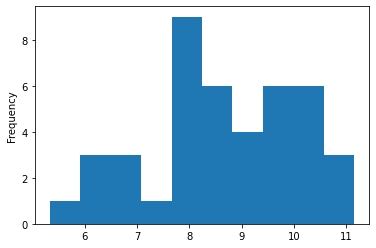

In [11]:
summary_df["-log(Kd)"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

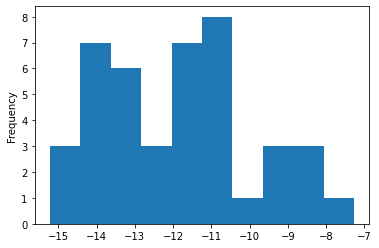

In [12]:
summary_df["delta_g"].plot.hist()